In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
import pyarrow.fs as pa_fs
import pandas as pd
from hdfs import InsecureClient

In [ ]:
base_hdfs_path = '/user/master/bird_images/'

# Danh sách các loài chim
bird_types = [
    'AMERICAN_GOLDFINCH',
    'BARN_OWL',
    'CARMINE_BEE_EATER',
    'DOWNY_WOODPECKER',
    'EMPORER_PENGUIN',
    'FLAMINGO'
]

In [24]:
client_hdfs = InsecureClient('http://master:9870', user='master')
base_hdfs_path = '/user/master/bird_images/'
bird_type = ''
hdfs_path = os.path.join(base_hdfs_path, bird_type)


In [62]:
counts = []
corrupted_files = []
sizes = []
def survey_bird_images(bird_type, num_samples=3):
    print(f"\n--- Loại chim: {bird_type} ---")
    hdfs_path = os.path.join(base_hdfs_path, bird_type)
    
    # Liệt kê các file trong thư mục
    try:
        files = client_hdfs.list(hdfs_path)
    except Exception as e:
        print(f"Lỗi khi truy cập {hdfs_path}: {e}")
        return
    counts.append(len(files))
    print(f"Số lượng ảnh: {len(files)}")
    
    # Hiển thị một số hình ảnh mẫu
    if len(files) == 0:
        print(f"Không có ảnh trong thư mục {hdfs_path}")
        counts.append(0)
        return
    
    # Tạo subplot để hiển thị các hình ảnh trên cùng một hàng
    fig, axes = plt.subplots(2, num_samples, figsize=(15, 5))
    fig.suptitle(f"Sample images and histograms of {bird_type}", fontsize=16)
    
    # sample_files = files[:num_samples]  # Chỉ lấy một số file để hiển thị
    for i, file in enumerate(files):
        try:
            # Đọc ảnh từ HDFS bằng PyArrow
            with client_hdfs.read(os.path.join(hdfs_path, file)) as reader:
                img_array = np.asarray(bytearray(reader.read()), dtype=np.uint8)
                img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
            
            # Kiểm tra nếu ảnh không bị lỗi
            if img is None:
                print(f"Không thể đọc file {file}")
                corrupted_files.append(file)
                axes[0,i].set_title("Error")
                axes[0,i].axis('off')
                axes[1,i].axis('off')
                continue
            sizes.append(img.shape[:2])
            # Hiển thị ảnh
            if i < 3:
                axes[0,i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                axes[0,i].set_title(file)
                axes[0,i].axis('off')
                
                gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                
                axes[1, i].hist(gray_img.ravel(), bins=256, range=[0, 256])
                axes[1, i].set_title(f"Histogram for {file}")
                axes[1, i].set_xlabel('Pixel Intensity')
                axes[1, i].set_ylabel('Frequency')

        except Exception as e:
            corrupted_files.append(file)
            print(f"Lỗi khi đọc file {file}: {e}")
    print(f"Số lượng ảnh bị hỏng: {len(corrupted_files)}")
    if corrupted_files:
        print("Danh sách ảnh bị hỏng:", corrupted_files)
    unique_sizes = set(sizes)
    print(f"Số lượng kích thước khác nhau: {len(unique_sizes)}")
    print(f"Kích thước phổ biến: {unique_sizes}")
    plt.show()


--- Loại chim: AMERICAN_GOLDFINCH ---
Số lượng ảnh: 143
Số lượng ảnh bị hỏng: 0
Số lượng kích thước khác nhau: 1
Kích thước phổ biến: {(224, 224)}


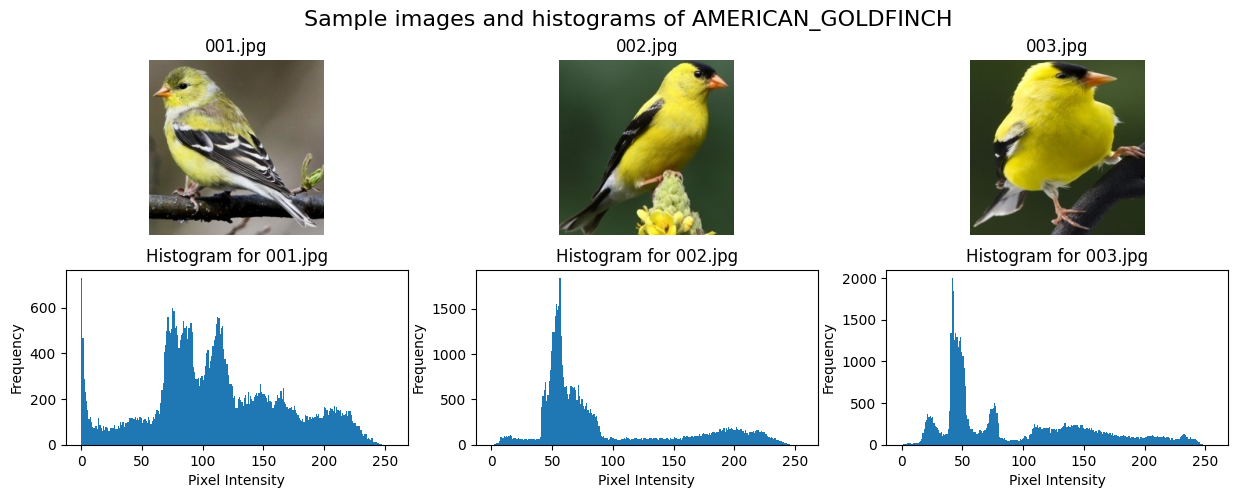


--- Loại chim: BARN_OWL ---
Số lượng ảnh: 129
Số lượng ảnh bị hỏng: 0
Số lượng kích thước khác nhau: 1
Kích thước phổ biến: {(224, 224)}


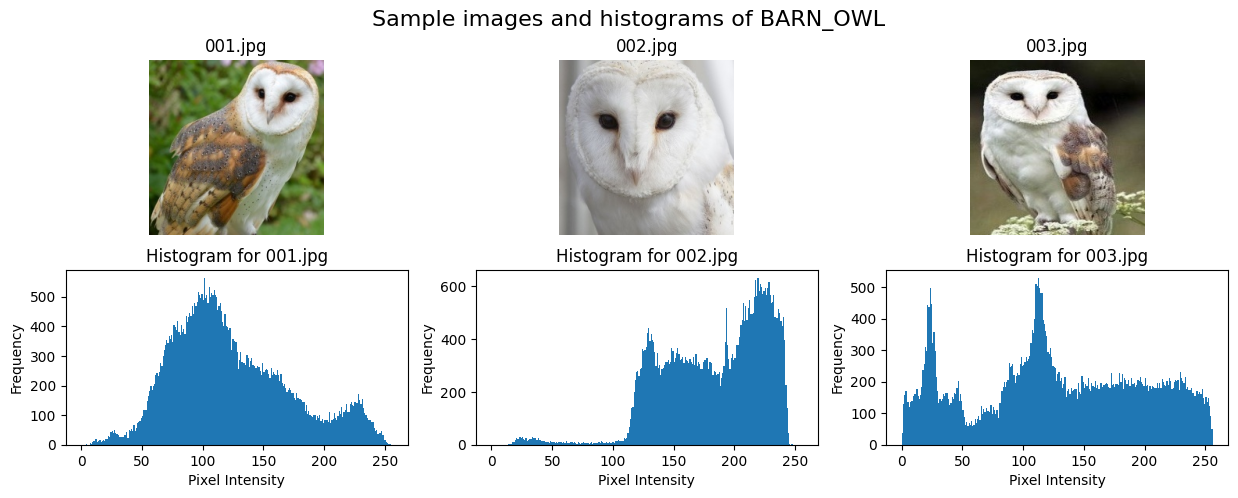


--- Loại chim: CARMINE_BEE_EATER ---
Số lượng ảnh: 131
Số lượng ảnh bị hỏng: 0
Số lượng kích thước khác nhau: 1
Kích thước phổ biến: {(224, 224)}


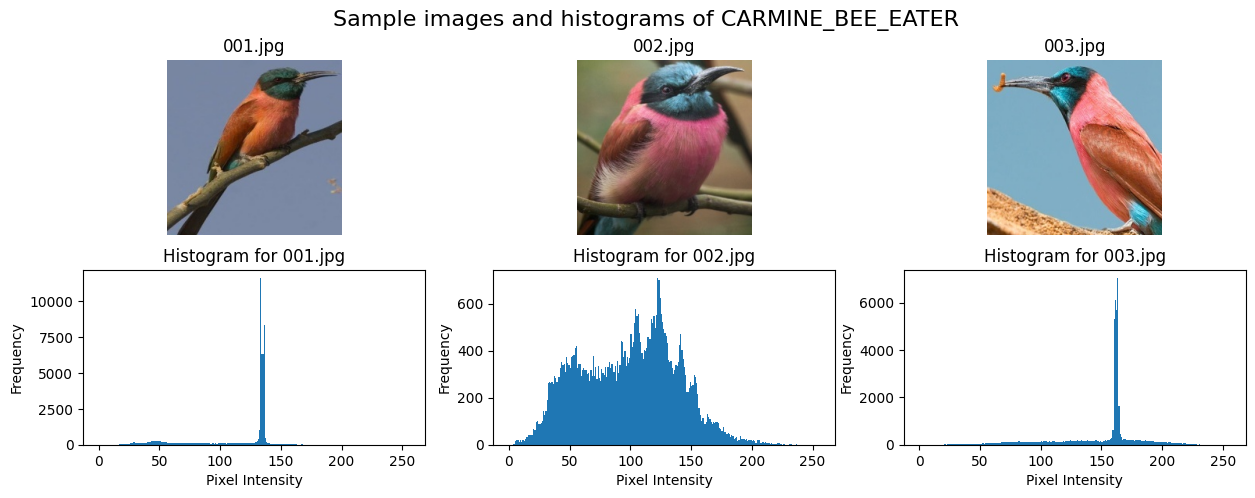


--- Loại chim: DOWNY_WOODPECKER ---
Số lượng ảnh: 137
Số lượng ảnh bị hỏng: 0
Số lượng kích thước khác nhau: 1
Kích thước phổ biến: {(224, 224)}


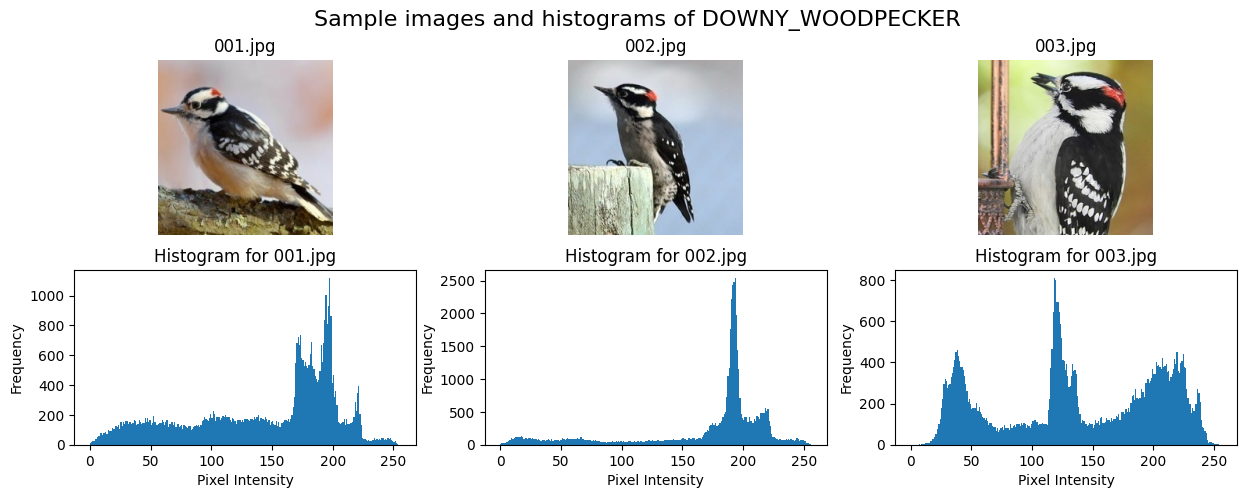


--- Loại chim: EMPORER_PENGUIN ---
Số lượng ảnh: 139
Số lượng ảnh bị hỏng: 0
Số lượng kích thước khác nhau: 1
Kích thước phổ biến: {(224, 224)}


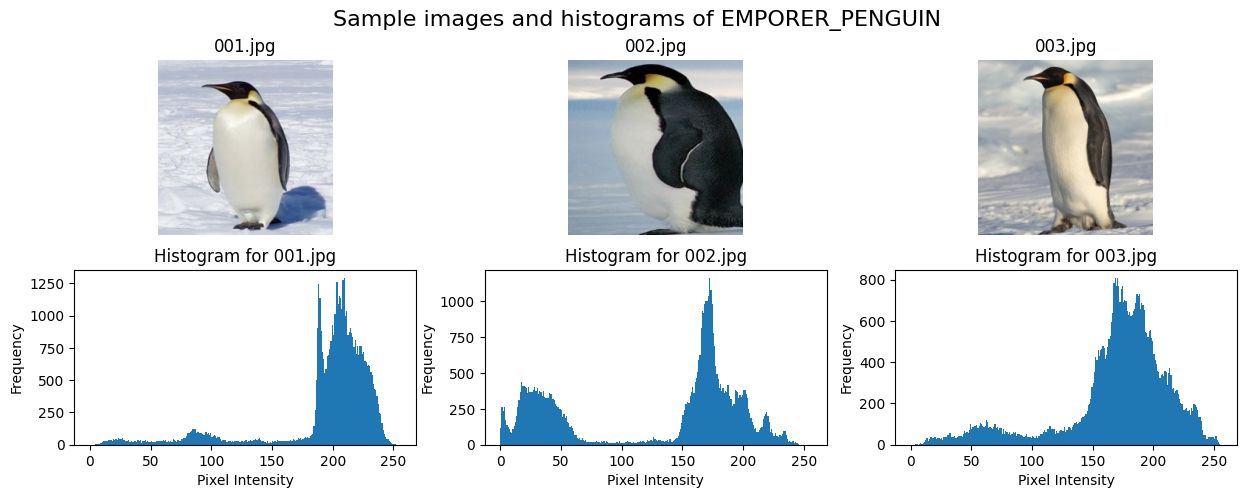


--- Loại chim: FLAMINGO ---
Số lượng ảnh: 132
Số lượng ảnh bị hỏng: 0
Số lượng kích thước khác nhau: 1
Kích thước phổ biến: {(224, 224)}


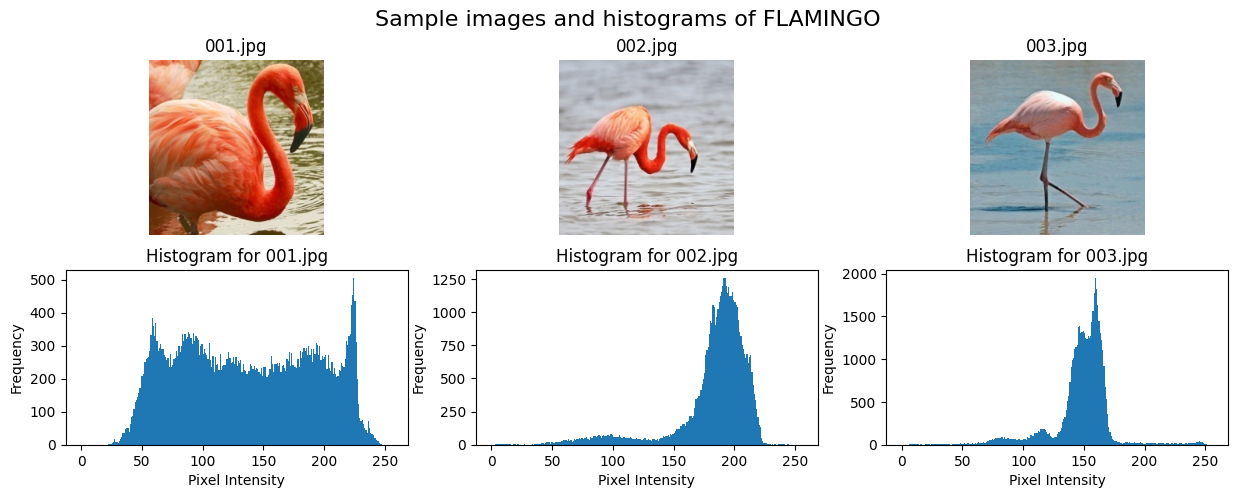

In [63]:
for bird_type in bird_types:
    survey_bird_images(bird_type, 3)

['AMERICAN_GOLDFINCH', 'BARN_OWL', 'CARMINE_BEE_EATER', 'DOWNY_WOODPECKER', 'EMPORER_PENGUIN', 'FLAMINGO']


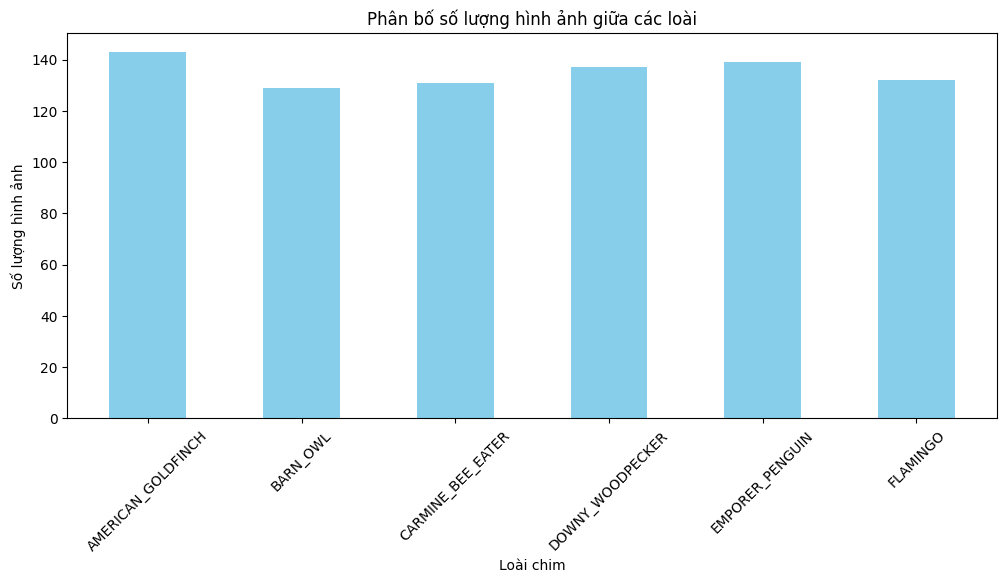

In [36]:
# Vẽ biểu đồ phân phối
print (bird_types)
plt.figure(figsize=(12, 5))
bar_width = 0.5
plt.bar(bird_types, counts, width=bar_width, color='skyblue')
plt.xlabel('Loài chim')
plt.ylabel('Số lượng hình ảnh')
plt.title('Phân bố số lượng hình ảnh giữa các loài')
plt.xticks(rotation=45)
plt.show()



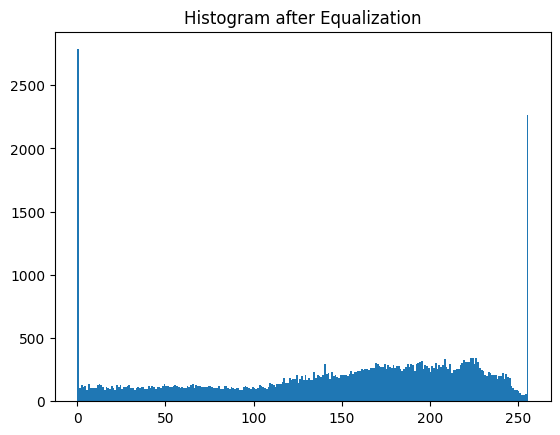

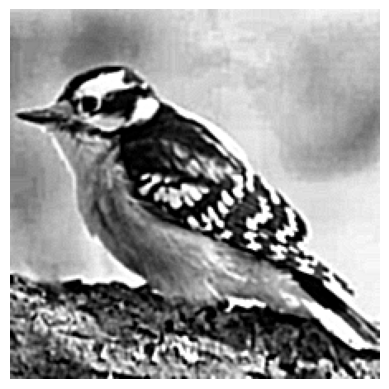

In [ ]:
# def histogram_equalization(image):
#     gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     equalized_image = cv2.equalizeHist(gray_image)
#     clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#     clahe_image = clahe.apply(equalized_image)
#     blurred_image = cv2.GaussianBlur(clahe_image, (5, 5), 0)
#     kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
#     sharpened_image = cv2.filter2D(blurred_image, -1, kernel)
#     return sharpened_image

# # Áp dụng vào hình ảnh và vẽ histogram]]
# pathImg = os.path.join(base_hdfs_path, 'DOWNY_WOODPECKER')
# with client_hdfs.read(os.path.join(pathImg, '001.jpg')) as reader:
#                 img_array = np.asarray(bytearray(reader.read()), dtype=np.uint8)
#                 img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
# equalized_img = histogram_equalization(img)
# plt.hist(equalized_img.ravel(), bins=256, range=[0, 256])
# plt.title("Histogram after Equalization")
# plt.show()
# image_rgb = cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB)
# plt.imshow(image_rgb)
# plt.axis('off')  # Tắt trục
# plt.show()
